This code performs a Multi-Attribute Utility Theory (MAUT) analysis on a dataset of options. MAUT is a decision-making technique that evaluates alternatives based on multiple criteria. The code reads an Excel file containing the data, preprocesses it by removing unnecessary rows and columns, and renames the columns. It then applies Min-Max normalization to the numeric columns and assigns weights to each attribute. Weighted scores are calculated for each attribute, and an overall score is computed by summing the weighted scores. The options are ranked based on the overall scores, and the ranked options are saved to a CSV file. Finally, a utility curve is plotted using Matplotlib to visualize the relationship between vendors and their utility scores. The utility curve helps in understanding the relative performance of different vendors and assists in decision-making.

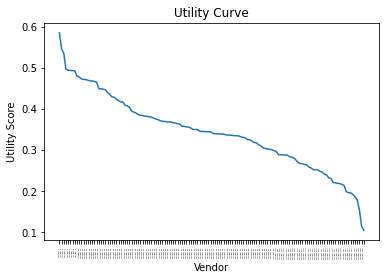

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the Excel file and skip the first row
data = pd.read_excel('Consolidated data.xlsx', skiprows=1)

# Remove first column
data = data.iloc[:, 1:]

# Remove the last two rows
data = data.iloc[:-2]

# Rename the columns
data.columns = ['S.no', 'Company', 'Vendor', 'IRR', 'Strategic fit', 'Technical Feasibility',
                'Uniqueness of R&D', 'Reputational risk', 'Market and Business risk',
                'Scalability', 'Regulatory risk', 'Market factors'] + data.columns[12:].tolist()

# Convert numeric columns to numeric data type
numeric_columns = ['IRR', 'Strategic fit', 'Technical Feasibility', 'Uniqueness of R&D',
                   'Reputational risk', 'Market and Business risk', 'Scalability',
                   'Regulatory risk', 'Market factors']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply Min-Max normalization to the numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Assign weights to each attribute
weights = {
    'IRR': 0.2,
    'Strategic fit': 0.1,
    'Technical Feasibility': 0.15,
    'Uniqueness of R&D': 0.1,
    'Reputational risk': 0.1,
    'Market and Business risk': 0.1,
    'Scalability': 0.1,
    'Regulatory risk': 0.1,
    'Market factors': 0.05
}

# Calculate weighted scores for each attribute
for attribute in weights:
    data[attribute + '_weighted'] = data[attribute] * weights[attribute]

# Calculate overall scores
data['overall_score'] = data.filter(like='_weighted').sum(axis=1)

# Rank options based on overall scores
ranked_data = data.sort_values('overall_score', ascending=False)

# Abbreviate vendor names
abbreviated_names = ['Vendor {}'.format(i + 1) for i in range(len(ranked_data))]
ranked_data['Abbreviated Vendor'] = abbreviated_names

# Save ranked options to CSV
ranked_data[['S.no', 'Company', 'Vendor', 'Abbreviated Vendor', 'overall_score']].to_csv('Options.csv', index=False)
output = pd.read_csv('Options.csv')

# Plot utility curve
plt.plot(output['Abbreviated Vendor'], output['overall_score'])
plt.xlabel('Vendor')
plt.ylabel('Utility Score')
plt.title('Utility Curve')
plt.xticks(rotation=90,fontsize=2)
plt.show()


In [ ]:
# linear